# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()['fare']
total_rides_by_type = total_rides_by_type.rename('Total Rides')
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type = total_drivers_by_type.rename('Total Drivers')
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type = total_fares_by_type.rename('Total Fares')
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_ride = average_fare_per_ride.rename('Average Fare per Ride')
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fares_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / total_drivers_by_type
average_fares_per_driver = average_fares_per_driver.rename('Average Fare per Driver')
average_fares_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.merge(total_rides_by_type, 
                        total_drivers_by_type,
                        how="left",  on=["type",]).merge(total_fares_by_type, 
                        how="left",  on=["type",]).merge(average_fare_per_ride, 
                        how="left",  on=["type",]).merge(average_fares_per_driver,
                        how="left",  on=["type",])

 
                         
pyber_summary_df
pyber_summary_datadf = pyber_summary_df


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [52]:
#  8. Format the columns.
pyber_summary_df = pyber_summary_df.round(decimals = 2)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:,}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,}".format)
pyber_summary_df

pyber_summary_df.savefig('analysis/PyBer_fare_summary.png')

ValueError: Cannot specify ',' with 's'.

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_df_data = pyber_data_df
pyber_df_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_sum_date = pyber_df_data.groupby(['type', 'date']).sum()['fare']
fares_sum_date = fares_sum_date.to_frame()

In [14]:
fares_sum_date

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_sum_date = fares_sum_date.reset_index()

In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_sum_date = fares_sum_date.pivot(index='date', columns = 'type', values = 'fare')
fares_sum_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
Y2019_Beginning_fares = fares_sum_date.loc['2019-01-01 ?': '2019-04-28 ?']
Y2019_Beginning_fares.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Y2019_Beginning_fares.index = pd.to_datetime(Y2019_Beginning_fares.index)
Y2019_Beginning_fares

type,Rural,Suburban,Urban
date,,,
2019-01-02 00:13:08,NaN,44.71,NaN
2019-01-02 00:44:03,NaN,NaN,43.72
2019-01-02 00:56:53,NaN,NaN,37.34
2019-01-02 01:41:26,NaN,49.95,NaN
2019-01-02 01:46:40,NaN,NaN,34.79
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
Y2019_Beginning_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2019-01-02 00:13:08 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     113 non-null    float64
 1   Suburban  569 non-null    float64
 2   Urban     1502 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_sum_by_week = Y2019_Beginning_fares.resample('W').sum()
fare_sum_by_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [21]:
weeks_s = fare_sum_by_week.index
fare_sum_by_week_noindex = fare_sum_by_week.reset_index()
rural_s = fare_sum_by_week_noindex.iloc[:,1]
suburban_s = fare_sum_by_week_noindex.iloc[:,2]
urban_s = fare_sum_by_week_noindex.iloc[:,3]

In [42]:
#Import dependencies for graph
import datetime
import numpy as np
import matplotlib.dates as mdates

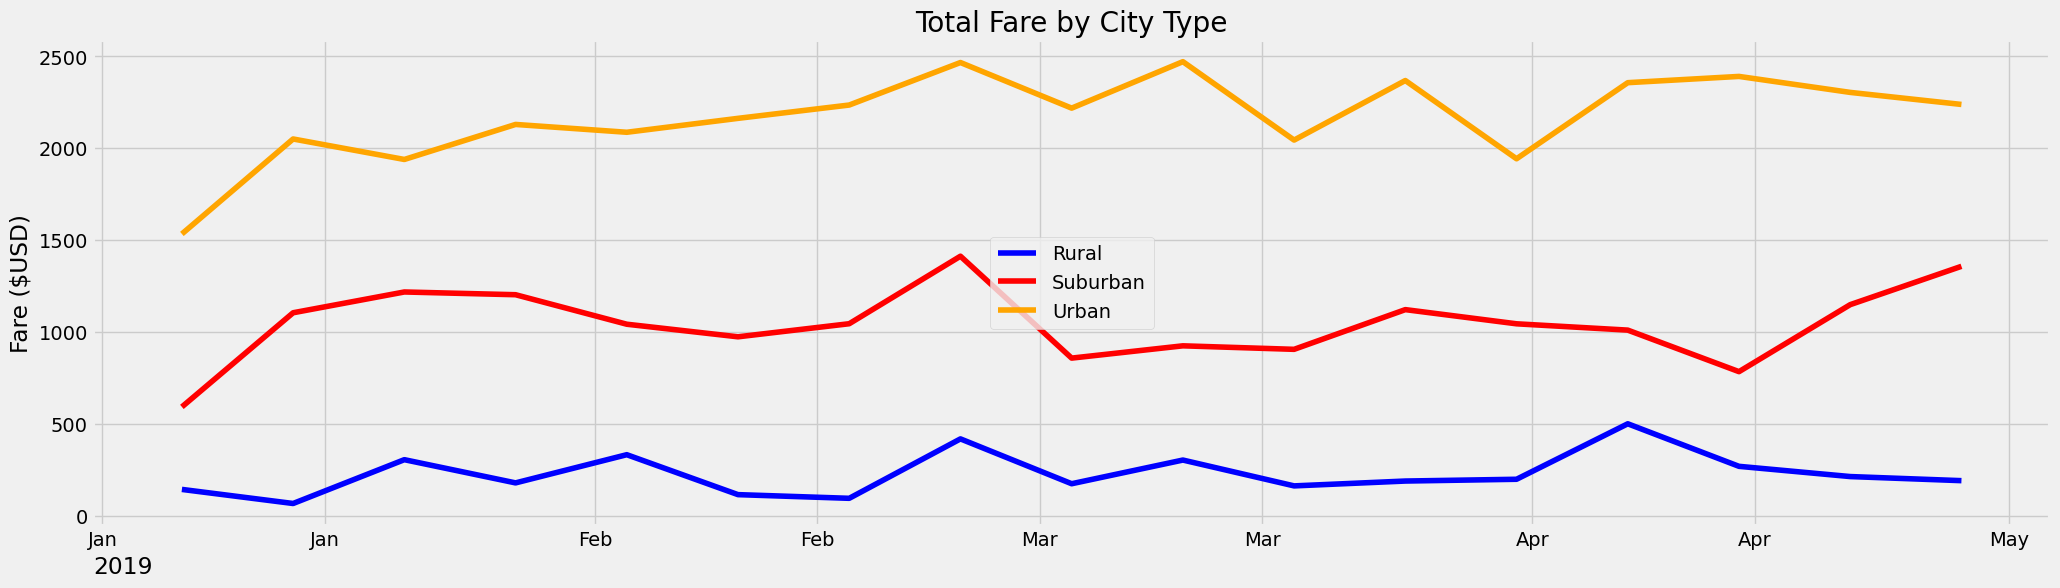

In [51]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots()
#add axis label
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("2019", loc='left')
#add rural data
ax.plot(weeks_s, rural_s, "blue", label="Rural")
#add suburban data
ax.plot(weeks_s, suburban_s, "red", label="Suburban") 
#add urban data
ax.plot(weeks_s, urban_s, "orange", label="Urban")
#change size
fig.set_size_inches(22.5,6)
fig.set_dpi(100)
#add title
plt.title("Total Fare by City Type")
#add legend
leg = ax.legend(loc='center',)

myFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(myFmt)


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#Save figure
plt.savefig('analysis/Total_Fare_by_City_Type.png')
#Show figure
plt.show()

Fig1 = plt.show()



<Figure size 640x480 with 0 Axes>